Import the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats



Load the Dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chocolate Sales.csv")

Display the basic information of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


Display few raw data

In [5]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


Remove $ and ',' symbol from the Amount column

In [6]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


Convert 'Date' Column to datetime format

In [7]:
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')
df.head()

<ipython-input-7-27b9bc64d638>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'],errors='coerce')


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


Ensure numerical columns are correct data types

In [8]:
df['Boxes Shipped'] =pd.to_numeric(df['Boxes Shipped'], errors='coerce')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


Checking for missing values

In [9]:
df.isnull().sum()

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


Handling the missing values

In [10]:
df.dropna(inplace=True)

Outlier detection using Z-score

In [11]:
numeric_cols = ['Amount','Boxes Shipped']
z_scores=np.abs(stats.zscore(df[numeric_cols]))
df= df[(z_scores < 3).all(axis=1)]
df.head()


,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184


2. Exploratory data analysis

*   Total Sales per data





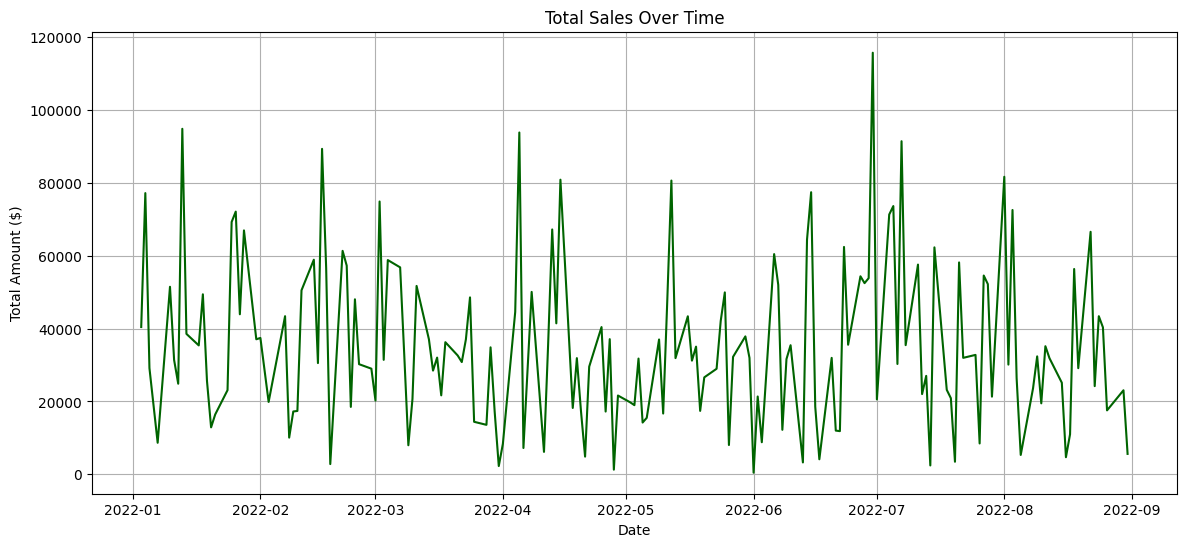

In [12]:
sales_by_date =df.groupby('Date')['Amount'].sum().reset_index()
sales_by_date

plt.figure(figsize=(14, 6))
sns.lineplot(data=sales_by_date, x='Date', y='Amount', color='darkgreen')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount ($)')
plt.grid(True)
plt.show()



Top Selling products

<ipython-input-13-cb1f3339f7fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


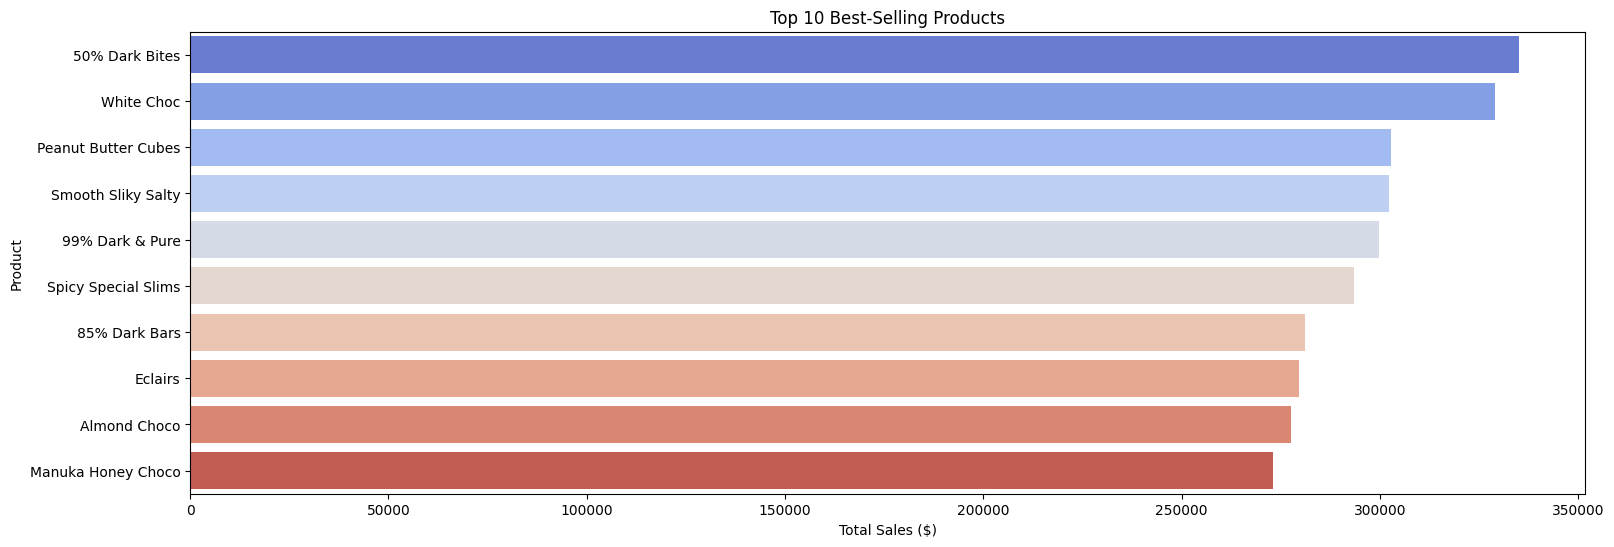

In [13]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(18,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()



Available Sales Per Product

<ipython-input-14-6a9a7d77168f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')


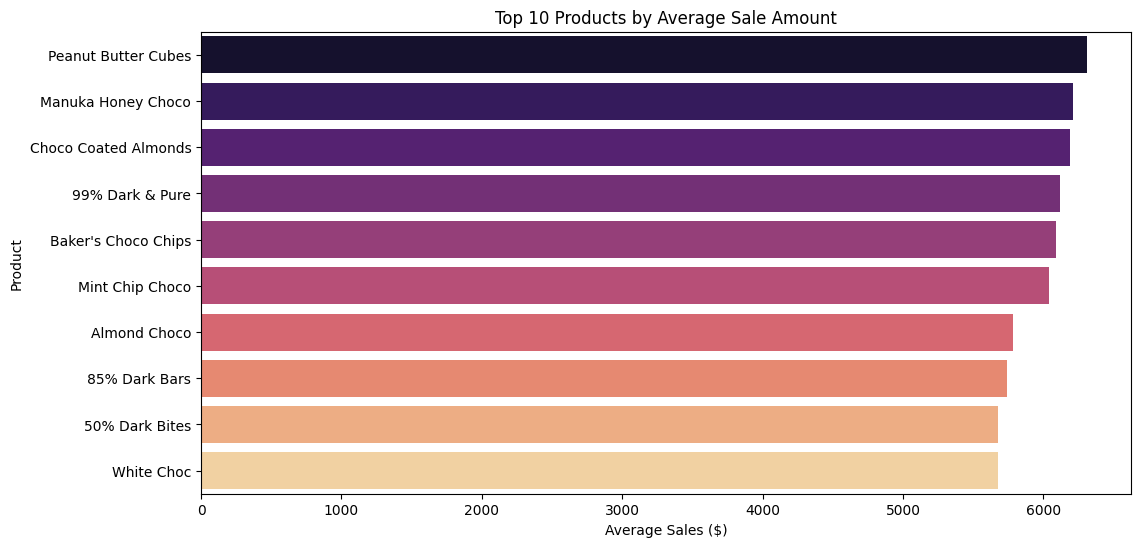

In [14]:
avg_sales_product = df.groupby('Product')['Amount'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_sales_product.values, y=avg_sales_product.index, palette='magma')
plt.title('Top 10 Products by Average Sale Amount')
plt.xlabel('Average Sales ($)')
plt.ylabel('Product')
plt.show()

Shipping & Logistics Analysis

1.  Average_boxes shipped per Country




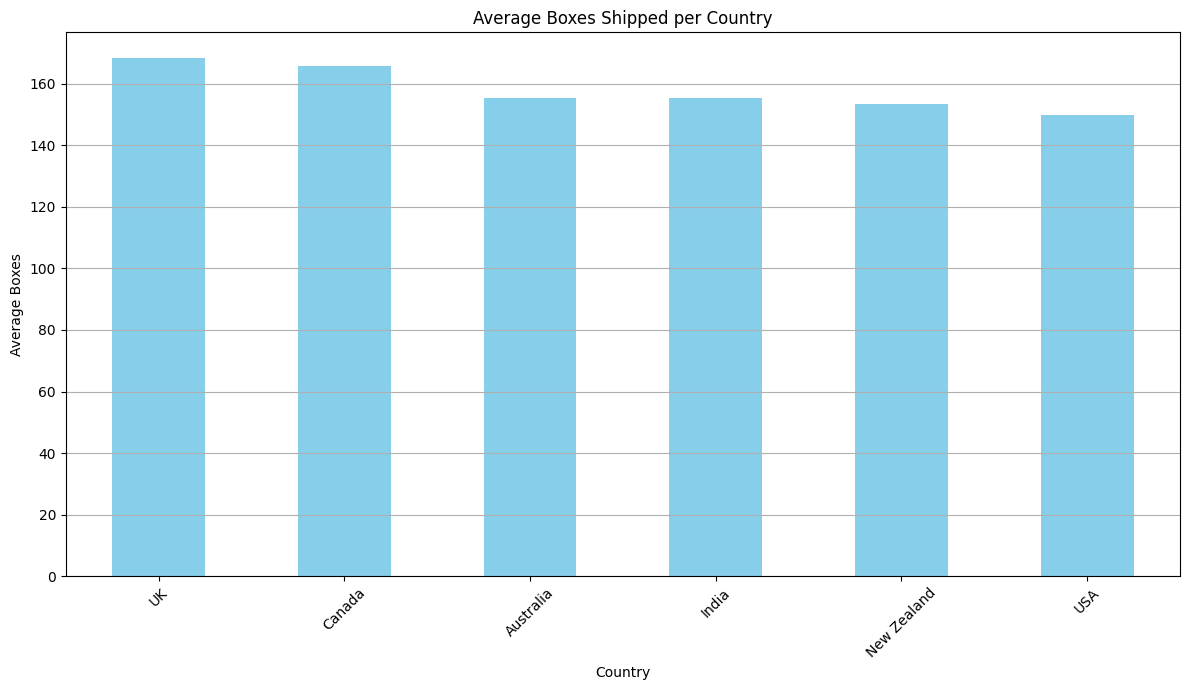

In [15]:
boxes_shipped = df.groupby('Country')['Boxes Shipped'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,7))
boxes_shipped.plot(kind='bar',color='skyblue')
plt.title('Average Boxes Shipped per Country')
plt.ylabel('Average Boxes')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Scatter plot : Boxes shipped vs Amount

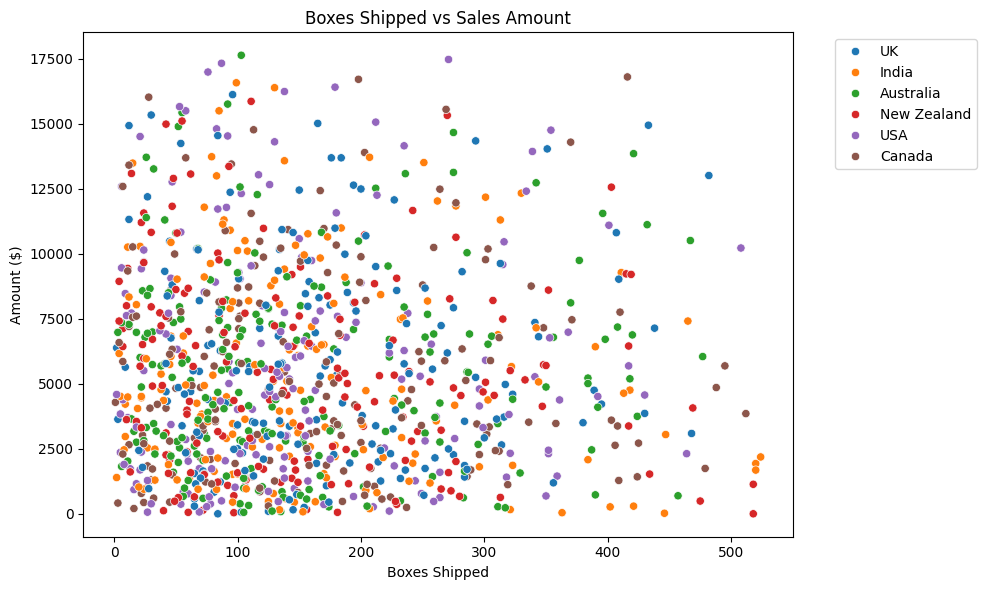

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Boxes Shipped', y='Amount', hue='Country')
plt.title('Boxes Shipped vs Sales Amount')
plt.xlabel('Boxes Shipped')
plt.ylabel('Amount ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Sales Representative Performance


*  Total Sales person



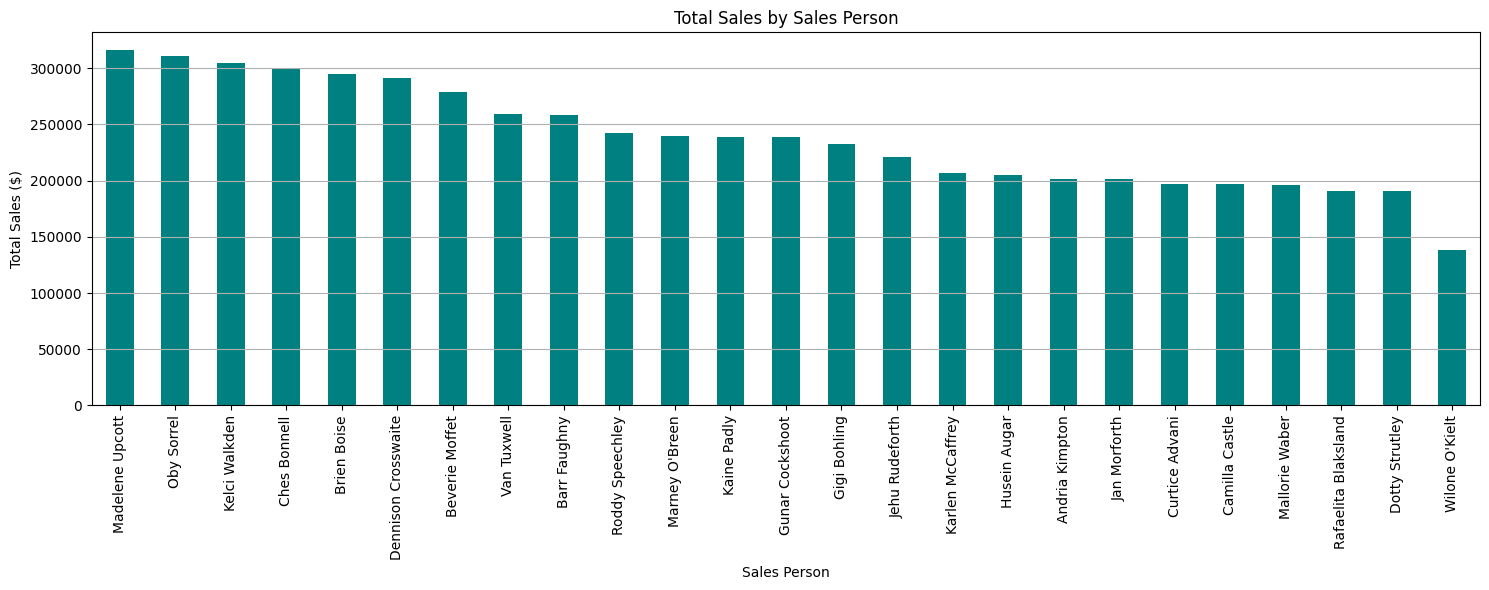

In [17]:
sales_by_rep = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))
sales_by_rep.plot(kind='bar', color='teal')
plt.title('Total Sales by Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Calculate average boxes shipped by each sales person

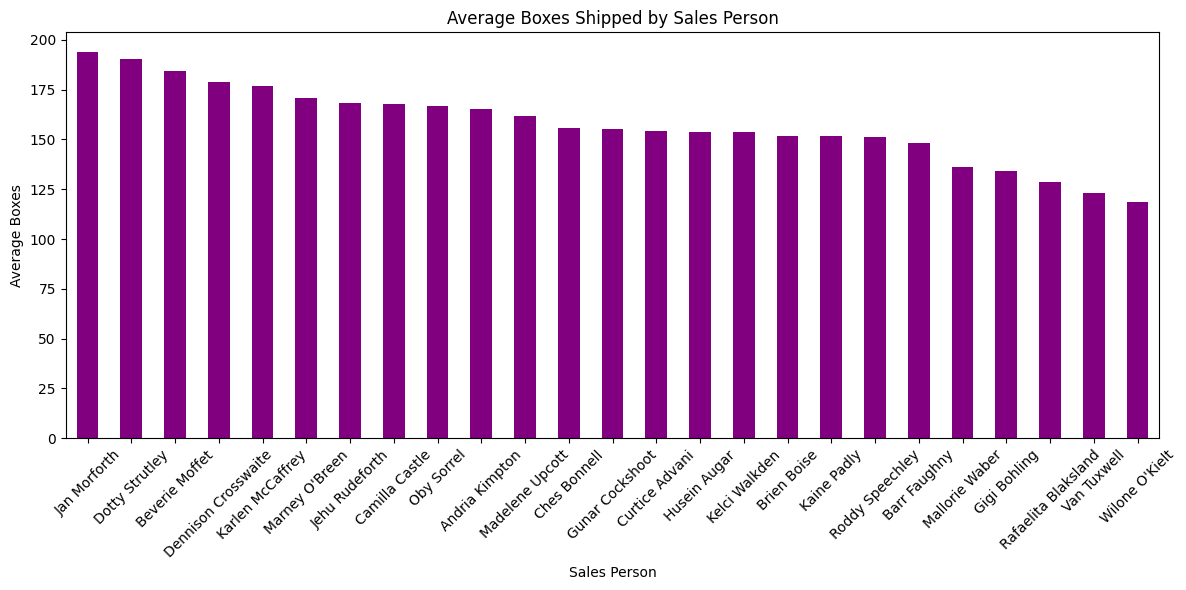

In [18]:
avg_boxes_rep = df.groupby('Sales Person')['Boxes Shipped'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_boxes_rep.plot(kind='bar', color='purple')
plt.title('Average Boxes Shipped by Sales Person')
plt.ylabel('Average Boxes')
plt.xlabel('Sales Person')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boxplot: Sales Amount Distribution per Sales Person

<ipython-input-19-ac914ab5e2f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sales Person', y='Amount', palette='Set3')


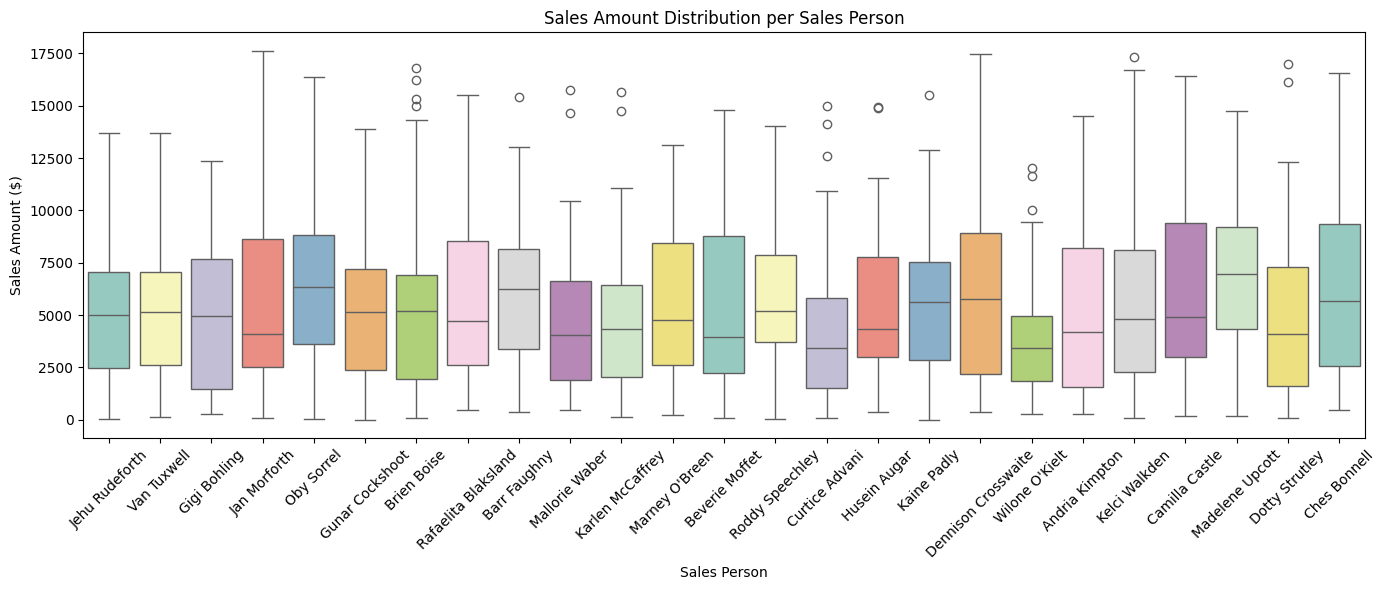

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='Sales Person', y='Amount', palette='Set3')
plt.title('Sales Amount Distribution per Sales Person')
plt.xlabel('Sales Person')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Seasonality Analysis – Monthly Sales Trends

1. Convert Date column to datetime format



In [20]:
df['Date'] = pd.to_datetime(df['Date'])

2. Create a 'Month' column in Year-Month format

In [21]:
df['Month'] = df['Date'].dt.to_period('M')

3. Calculate total sales per month

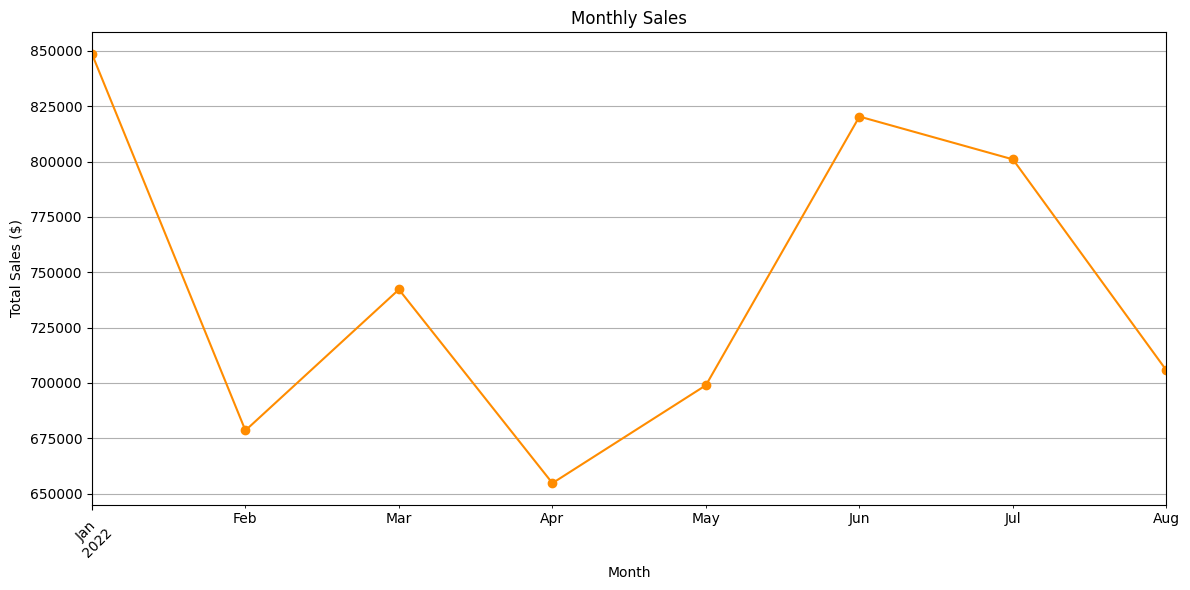

In [22]:
sales_per_month = df.groupby('Month')['Amount'].sum()
plt.figure(figsize=(12,6))
sales_per_month.plot(kind='line',marker='o',color='darkorange')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight Generation & Business Recommendations


*  Most profitable country




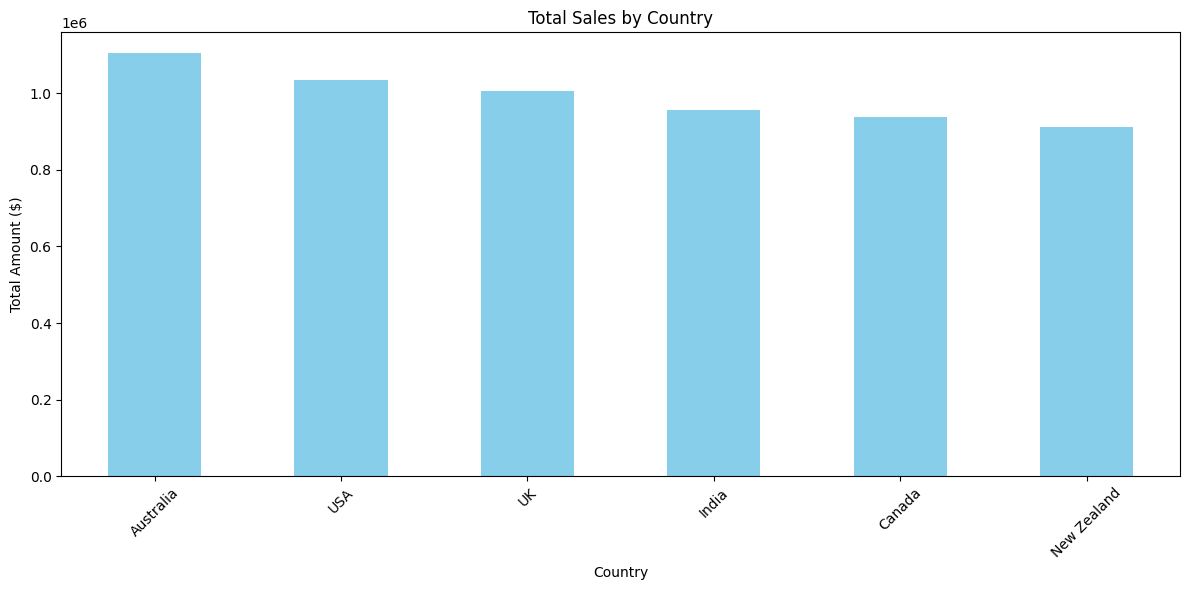

In [23]:
sales_by_country = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_country.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Country')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Efficient Sales Representatives

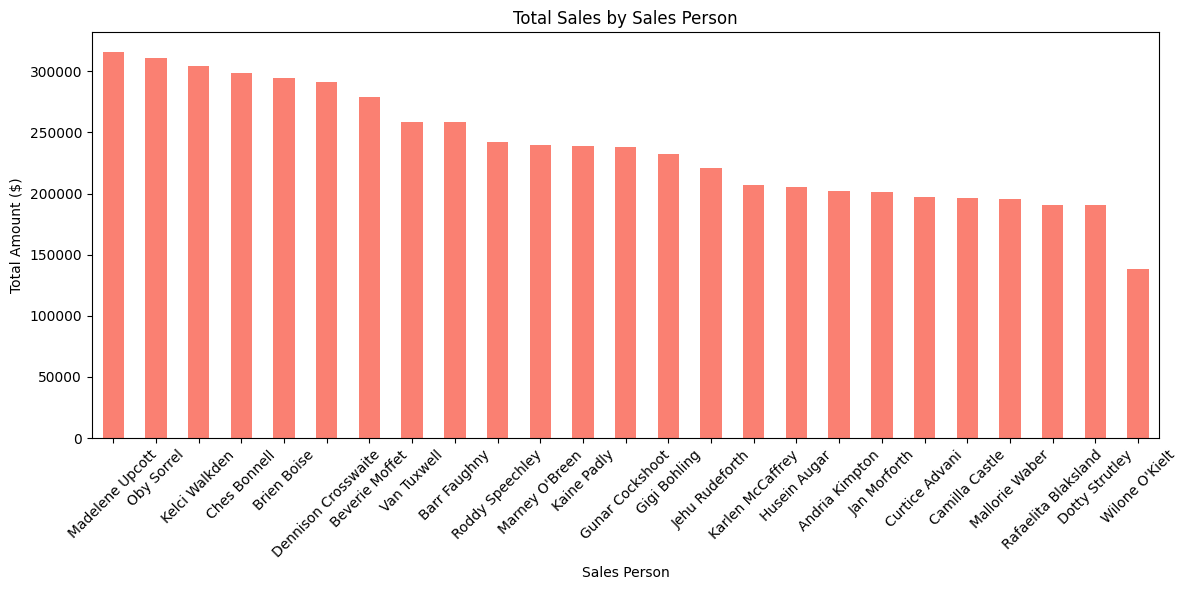

In [24]:
sales_by_rep = df.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sales_by_rep.plot(kind='bar', color='salmon')
plt.title('Total Sales by Sales Person')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most Popular Products

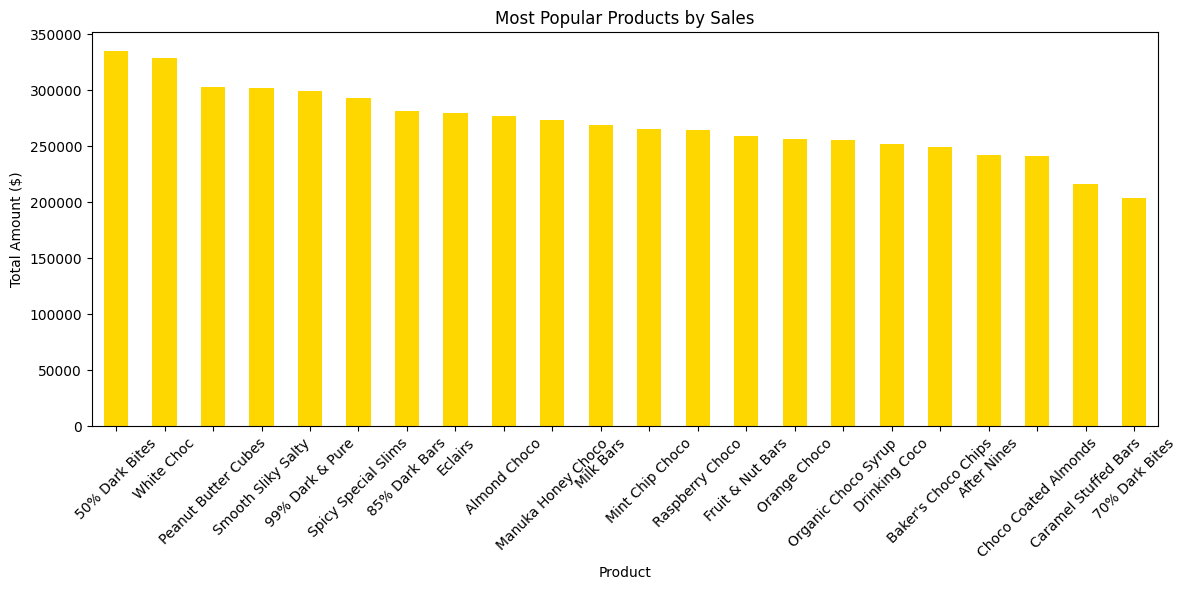

In [25]:
top_products = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
top_products.plot(kind='bar', color='gold')
plt.title('Most Popular Products by Sales')
plt.ylabel('Total Amount ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Product Combination Preference

*  Get product combinations by customer per day (if possible)




<ipython-input-28-549920d997ea>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_combos, x='Frequency', y=top_combos['Product Pair'].astype(str), palette='Blues_r')


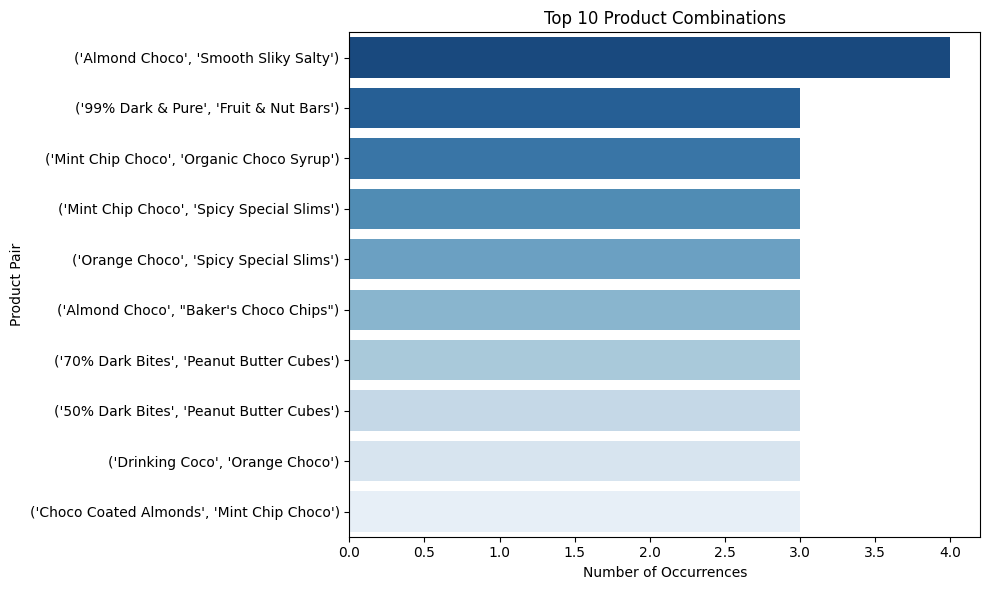

In [28]:
from itertools import combinations
from collections import Counter
combo_df = df.groupby(['Date', 'Sales Person'])['Product'].apply(lambda x: list(x)).reset_index()
combinations_counter = Counter()

for products in combo_df['Product']:
    if len(products) > 1:
        combos = combinations(sorted(set(products)), 2)
        combinations_counter.update(combos)

top_combos = pd.DataFrame(combinations_counter.most_common(10), columns=['Product Pair', 'Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(data=top_combos, x='Frequency', y=top_combos['Product Pair'].astype(str), palette='Blues_r')
plt.title('Top 10 Product Combinations')
plt.xlabel('Number of Occurrences')
plt.ylabel('Product Pair')
plt.tight_layout()
plt.show()


Monthly Sales Trend for Seasonality

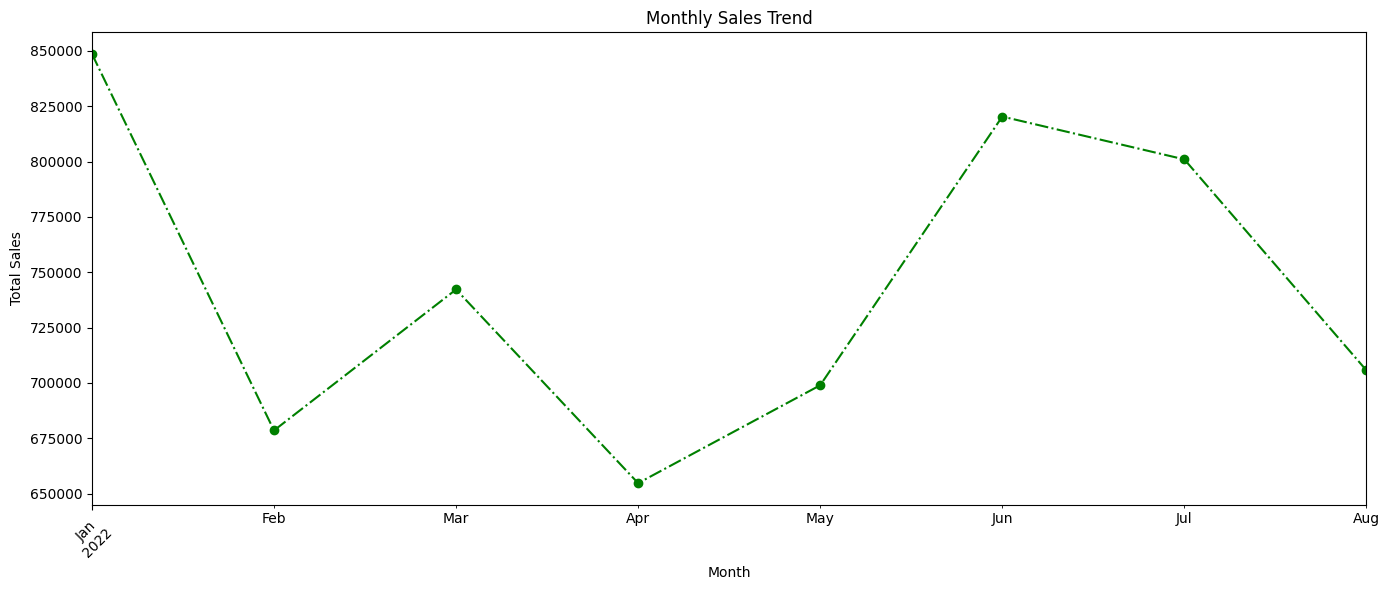

In [31]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()

plt.figure(figsize=(14,6))
monthly_sales.plot(marker='o', linestyle='-.', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Business Recommendations
1. Most profitable country

In [33]:
top_country = sales_by_country.idxmax()
top_country_amount = sales_by_country.max()
print(f"→ {top_country} has the highest total sales: ${top_country_amount:,.2f}.")

→ Australia has the highest total sales: $1,103,963.00.


2. Best Sales Person

In [ ]:
top_rep = sales_by_rep.idxmax()
print(f"→ Top sales representative is {top_rep}.")

3. Top Selling Product

In [ ]:
top_product = top_products.idxmax()
print(f"→ The most popular product is: {top_product}.")

Seasonal Suggestion

In [34]:
peak_month = monthly_sales.idxmax().strftime('%B %Y')
print(f"→ Highest sales observed in {peak_month}. You can increase production or launch campaigns in this period.")

→ Highest sales observed in January 2022. You can increase production or launch campaigns in this period.


Logistics Suggestion

In [35]:
avg_boxes_country = df.groupby('Country')['Boxes Shipped'].mean().sort_values(ascending=False)
low_efficiency_country = avg_boxes_country.idxmin()
print(f"→ Logistics improvement is needed in {low_efficiency_country}, where the average boxes per sale is lowest.")

→ Logistics improvement is needed in USA, where the average boxes per sale is lowest.
